In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [22]:
df = pd.read_csv('fraud_detection.csv')

In [23]:
df.shape

(39, 3)

In [24]:
df.head()

,dist_from_home,purchase_price_ratio,fraud
0,2.1,6.4,1
1,3.8,2.2,1
2,15.7,4.4,1
3,26.7,4.6,1
4,10.7,4.9,1


In [25]:
df.columns

Index(['dist_from_home', 'purchase_price_ratio', 'fraud'], dtype='object')

In [26]:
df['fraud'].value_counts()

0    21
1    18
Name: fraud, dtype: int64

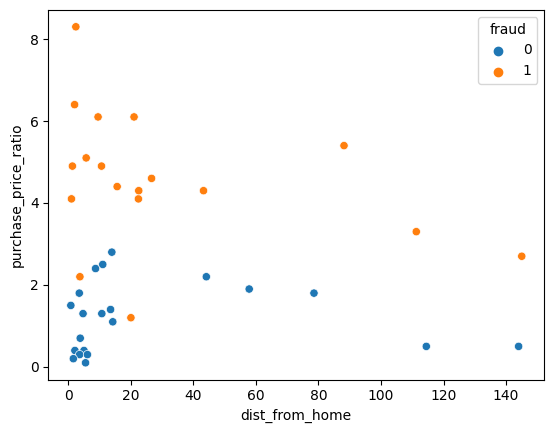

In [27]:
sns.scatterplot(x=df['dist_from_home'], y=df['purchase_price_ratio'], hue=df['fraud']);

In [28]:
# Split the data into features (X) and target (y)
X = df.drop('fraud', axis=1)
y = df['fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [31]:
#Model accuracy, how often is the classifier correct ?
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [32]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

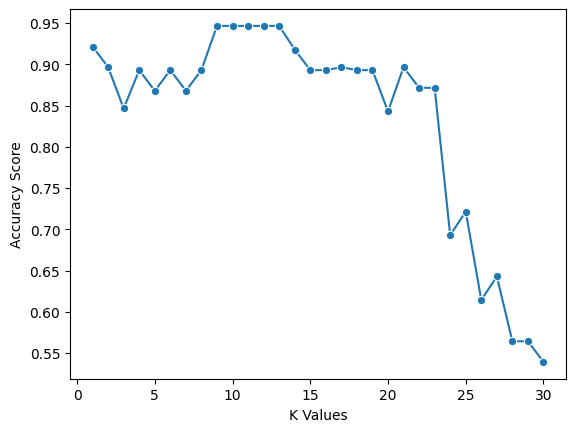

In [33]:
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score");

In [34]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [35]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0])

In [36]:
#Model accuracy, how often is the classifier correct ?
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.875
Precision: 0.75
Recall: 1.0
